# IMPORTANDO LIBRERÍAS

In [1272]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
import mlxtend
from math import sqrt
from pandas import Series, DataFrame

# IMPORTANDO Y EXPLORANDO DATOS

In [1097]:
#data
credit = pd.read_csv('default of credit card clients.csv', header=1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [1098]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# CAMBIANDO LOS NOMBRES A LAS VARIABLES

In [1099]:
credit = credit.rename(columns = {'PAY_0': 'HIST_SEP', 'PAY_2': 'HIST_AGO', 'PAY_3': 'HIST_JUL', 'PAY_4': 'HIST_JUN', 'PAY_5': 'HIST_MAY', 'PAY_6': 'HIST_ABR'}, inplace = False)

In [1100]:
credit = credit.rename(columns = {'BILL_AMT1': 'BILL_SEP', 'BILL_AMT2': 'BILL_AGO', 'BILL_AMT3': 'BILL_JUL', 'BILL_AMT4': 'BILL_JUN', 'BILL_AMT5': 'BILL_MAY', 'BILL_AMT6': 'BILL_ABR'}, inplace = False)

In [1101]:
credit = credit.rename(columns = {'PAY_AMT1': 'PAY_SEP', 'PAY_AMT2': 'PAY_AGO', 'PAY_AMT3': 'PAY_JUL', 'PAY_AMT4': 'PAY_JUN', 'PAY_AMT5': 'PAY_MAY', 'PAY_AMT6': 'PAY_ABR'}, inplace = False)

In [1102]:
credit = credit.rename(columns = {'default payment next month': 'DEFAULT'}, inplace = False)

In [1103]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,...,BILL_JUN,BILL_MAY,BILL_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [1104]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   HIST_SEP   30000 non-null  int64
 7   HIST_AGO   30000 non-null  int64
 8   HIST_JUL   30000 non-null  int64
 9   HIST_JUN   30000 non-null  int64
 10  HIST_MAY   30000 non-null  int64
 11  HIST_ABR   30000 non-null  int64
 12  BILL_SEP   30000 non-null  int64
 13  BILL_AGO   30000 non-null  int64
 14  BILL_JUL   30000 non-null  int64
 15  BILL_JUN   30000 non-null  int64
 16  BILL_MAY   30000 non-null  int64
 17  BILL_ABR   30000 non-null  int64
 18  PAY_SEP    30000 non-null  int64
 19  PAY_AGO    30000 non-null  int64
 20  PAY_JUL    30000 non-null  int64
 21  PAY_JUN    3

# DISCRETIZANDO

In [1105]:
# DISCRETIZANDO EDAD
credit['BINNED'] = pd.cut(x=credit['AGE'], bins=[0,25,30,40,50,60,70,80,90,100,200])
credit['AGE_RANGE'] = pd.cut(x=credit['AGE'], bins=[0,25,30,40,50,60,70,80,90,100,200], labels = [1,2,3,4,5,6,7,8,9,10])
pd.value_counts(credit.AGE_RANGE)

3     10713
2      7142
4      6005
1      3871
5      1997
6       257
7        15
10        0
9         0
8         0
Name: AGE_RANGE, dtype: int64

In [1106]:
# DISCRETIZANDO LÍMITE DE CRÉDITO
credit['CRDBINNED'] = pd.cut(x=credit['LIMIT_BAL'], bins=[0,10000,50000,100000,200000,300000,400000,500000,600000,1000000])
credit['CREDIT_RANGE'] = pd.cut(x=credit['LIMIT_BAL'], bins=[0,10000,50000,100000,200000,300000,400000,500000,600000,1000000], labels = [1,2,3,4,5,6,7,8,9])
pd.value_counts(credit.CREDIT_RANGE)

4    7880
2    7183
5    5059
3    4822
6    2759
7    1598
1     493
8     127
9      79
Name: CREDIT_RANGE, dtype: int64

In [1107]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,...,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT,BINNED,AGE_RANGE,CRDBINNED,CREDIT_RANGE
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,"(0, 25]",1,"(10000, 50000]",2
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,"(25, 30]",2,"(100000, 200000]",4
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,"(30, 40]",3,"(50000, 100000]",3
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,"(30, 40]",3,"(10000, 50000]",2
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,"(50, 60]",5,"(10000, 50000]",2


In [1108]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'HIST_SEP',
       'HIST_AGO', 'HIST_JUL', 'HIST_JUN', 'HIST_MAY', 'HIST_ABR', 'BILL_SEP',
       'BILL_AGO', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_ABR', 'PAY_SEP',
       'PAY_AGO', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_ABR', 'DEFAULT',
       'BINNED', 'AGE_RANGE', 'CRDBINNED', 'CREDIT_RANGE'],
      dtype='object')


# PREPROCESAMIENTO Y FEATURE SELECTION

In [1109]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [1196]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [1111]:
cv = KFold(n_splits=10, random_state=None, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [1112]:
corrMat = credit.corr()
print(corrMat)

                 ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION  0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
HIST_SEP  -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
HIST_AGO  -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
HIST_JUL  -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
HIST_JUN  -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
HIST_MAY  -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
HIST_ABR  -0.020270  -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_SEP   0.019389   0.2

In [1113]:
covMat = credit.cov()
print(covMat)

                     ID     LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
ID         7.500250e+07  2.941664e+07    78.356379    268.154338  -131.452515   
LIMIT_BAL  2.941664e+07  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        7.835638e+01  1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION  2.681543e+02 -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -1.314525e+02 -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.491057e+03  1.730767e+05    -0.409726      1.275380    -1.992764   
HIST_SEP  -2.975726e+02 -3.954593e+04    -0.031685      0.093584     0.011683   
HIST_AGO  -1.162770e+02 -4.603765e+04    -0.041442      0.115025     0.015122   
HIST_JUL  -1.916922e+02 -4.443225e+04    -0.038694      0.107861     0.020421   
HIST_JUN  -2.769132e+01 -4.057181e+04    -0.034411      0.100528     0.020213   
HIST_MAY  -2.178600e+02 -3.667056e+04    -0.030521      0.087340     0.021074   
HIST_ABR  -2.018774e+02 -3.5

In [1114]:
corrMat.style.background_gradient(cmap='coolwarm')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,HIST_ABR,BILL_SEP,BILL_AGO,BILL_JUL,BILL_JUN,BILL_MAY,BILL_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
HIST_SEP,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
HIST_AGO,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
HIST_JUL,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
HIST_JUN,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [1115]:
credit = credit.drop(['BILL_SEP','BILL_AGO','BILL_JUL','BILL_JUN','BILL_MAY','BILL_ABR'], axis=1)

In [1116]:
credit = credit.drop(['ID'], axis=1)

In [1117]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LIMIT_BAL     30000 non-null  int64   
 1   SEX           30000 non-null  int64   
 2   EDUCATION     30000 non-null  int64   
 3   MARRIAGE      30000 non-null  int64   
 4   AGE           30000 non-null  int64   
 5   HIST_SEP      30000 non-null  int64   
 6   HIST_AGO      30000 non-null  int64   
 7   HIST_JUL      30000 non-null  int64   
 8   HIST_JUN      30000 non-null  int64   
 9   HIST_MAY      30000 non-null  int64   
 10  HIST_ABR      30000 non-null  int64   
 11  PAY_SEP       30000 non-null  int64   
 12  PAY_AGO       30000 non-null  int64   
 13  PAY_JUL       30000 non-null  int64   
 14  PAY_JUN       30000 non-null  int64   
 15  PAY_MAY       30000 non-null  int64   
 16  PAY_ABR       30000 non-null  int64   
 17  DEFAULT       30000 non-null  int64   
 18  BINNED

In [1118]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,...,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT,BINNED,AGE_RANGE,CRDBINNED,CREDIT_RANGE
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,"(0, 25]",1,"(10000, 50000]",2
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,"(25, 30]",2,"(100000, 200000]",4
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,"(30, 40]",3,"(50000, 100000]",3
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,"(30, 40]",3,"(10000, 50000]",2
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,"(50, 60]",5,"(10000, 50000]",2


In [1119]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  HIST_SEP  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
HIST_SEP   -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
HIST_AGO   -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
HIST_JUL   -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
HIST_JUN   -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
HIST_MAY   -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
HIST_ABR   -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
PAY_SEP     0.195236 -0.000242  -0.037456 -0.005979  0.026147 -0.079269   
PAY_AGO     0.178408 -0.0

In [1120]:
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.730767e+05    -0.409726      1.275380    -1.992764   
HIST_SEP  -3.954593e+04    -0.031685      0.093584     0.011683   
HIST_AGO  -4.603765e+04    -0.041442      0.115025     0.015122   
HIST_JUL  -4.443225e+04    -0.038694      0.107861     0.020421   
HIST_JUN  -4.057181e+04    -0.034411      0.100528     0.020213   
HIST_MAY  -3.667056e+04    -0.030521      0.087340     0.021074   
HIST_ABR  -3.509308e+04    -0.024754      0.074816     0.020616   
PAY_SEP    4.195711e+08    -1.964266   -490.330155   -51.691615   
PAY_AGO    5.333504e+08   -15.675500   -547.005021   -97.327974   
PAY_JUL    4.801180e+08   -74.034812   -555.834305   -32.54608

In [1121]:
corrMat.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,HIST_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
HIST_SEP,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
HIST_AGO,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
HIST_JUL,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
HIST_JUN,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
HIST_MAY,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


# REVISANDO VARIABLES CON VARIACIÓN BAJA

In [1122]:
credit.var()

LIMIT_BAL       1.683446e+10
SEX             2.392474e-01
EDUCATION       6.246510e-01
MARRIAGE        2.724523e-01
AGE             8.496976e+01
HIST_SEP        1.262930e+00
HIST_AGO        1.433254e+00
HIST_JUL        1.432492e+00
HIST_JUN        1.366885e+00
HIST_MAY        1.284114e+00
HIST_ABR        1.322472e+00
PAY_SEP         2.743423e+08
PAY_AGO         5.308817e+08
PAY_JUL         3.100051e+08
PAY_JUN         2.454286e+08
PAY_MAY         2.334266e+08
PAY_ABR         3.160383e+08
DEFAULT         1.722763e-01
AGE_RANGE       1.287515e+00
CREDIT_RANGE    2.394470e+00
dtype: float64

No hay variables con variación para ser descartadas

In [1123]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LIMIT_BAL     30000 non-null  int64   
 1   SEX           30000 non-null  int64   
 2   EDUCATION     30000 non-null  int64   
 3   MARRIAGE      30000 non-null  int64   
 4   AGE           30000 non-null  int64   
 5   HIST_SEP      30000 non-null  int64   
 6   HIST_AGO      30000 non-null  int64   
 7   HIST_JUL      30000 non-null  int64   
 8   HIST_JUN      30000 non-null  int64   
 9   HIST_MAY      30000 non-null  int64   
 10  HIST_ABR      30000 non-null  int64   
 11  PAY_SEP       30000 non-null  int64   
 12  PAY_AGO       30000 non-null  int64   
 13  PAY_JUL       30000 non-null  int64   
 14  PAY_JUN       30000 non-null  int64   
 15  PAY_MAY       30000 non-null  int64   
 16  PAY_ABR       30000 non-null  int64   
 17  DEFAULT       30000 non-null  int64   
 18  BINNED

In [1124]:
credit = credit.drop(['BINNED','CRDBINNED','AGE','LIMIT_BAL'], axis=1)

In [1125]:
credit.head()

,SEX,EDUCATION,MARRIAGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,HIST_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT,AGE_RANGE,CREDIT_RANGE
0,2,2,1,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,1,2
1,2,2,2,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1,2,4
2,2,2,2,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0,3,3
3,2,2,1,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0,3,2
4,1,2,1,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0,5,2


In [1126]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SEX           30000 non-null  int64   
 1   EDUCATION     30000 non-null  int64   
 2   MARRIAGE      30000 non-null  int64   
 3   HIST_SEP      30000 non-null  int64   
 4   HIST_AGO      30000 non-null  int64   
 5   HIST_JUL      30000 non-null  int64   
 6   HIST_JUN      30000 non-null  int64   
 7   HIST_MAY      30000 non-null  int64   
 8   HIST_ABR      30000 non-null  int64   
 9   PAY_SEP       30000 non-null  int64   
 10  PAY_AGO       30000 non-null  int64   
 11  PAY_JUL       30000 non-null  int64   
 12  PAY_JUN       30000 non-null  int64   
 13  PAY_MAY       30000 non-null  int64   
 14  PAY_ABR       30000 non-null  int64   
 15  DEFAULT       30000 non-null  int64   
 16  AGE_RANGE     30000 non-null  category
 17  CREDIT_RANGE  30000 non-null  category
dtypes: cat

In [1127]:
credit['AGE_RANGE'] = credit['AGE_RANGE'].astype(int)
credit['CREDIT_RANGE'] = credit['CREDIT_RANGE'].astype(int)

In [1128]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SEX           30000 non-null  int64
 1   EDUCATION     30000 non-null  int64
 2   MARRIAGE      30000 non-null  int64
 3   HIST_SEP      30000 non-null  int64
 4   HIST_AGO      30000 non-null  int64
 5   HIST_JUL      30000 non-null  int64
 6   HIST_JUN      30000 non-null  int64
 7   HIST_MAY      30000 non-null  int64
 8   HIST_ABR      30000 non-null  int64
 9   PAY_SEP       30000 non-null  int64
 10  PAY_AGO       30000 non-null  int64
 11  PAY_JUL       30000 non-null  int64
 12  PAY_JUN       30000 non-null  int64
 13  PAY_MAY       30000 non-null  int64
 14  PAY_ABR       30000 non-null  int64
 15  DEFAULT       30000 non-null  int64
 16  AGE_RANGE     30000 non-null  int32
 17  CREDIT_RANGE  30000 non-null  int32
dtypes: int32(2), int64(16)
memory usage: 3.9 MB


In [1129]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SEX           30000 non-null  int64
 1   EDUCATION     30000 non-null  int64
 2   MARRIAGE      30000 non-null  int64
 3   HIST_SEP      30000 non-null  int64
 4   HIST_AGO      30000 non-null  int64
 5   HIST_JUL      30000 non-null  int64
 6   HIST_JUN      30000 non-null  int64
 7   HIST_MAY      30000 non-null  int64
 8   HIST_ABR      30000 non-null  int64
 9   PAY_SEP       30000 non-null  int64
 10  PAY_AGO       30000 non-null  int64
 11  PAY_JUL       30000 non-null  int64
 12  PAY_JUN       30000 non-null  int64
 13  PAY_MAY       30000 non-null  int64
 14  PAY_ABR       30000 non-null  int64
 15  DEFAULT       30000 non-null  int64
 16  AGE_RANGE     30000 non-null  int32
 17  CREDIT_RANGE  30000 non-null  int32
dtypes: int32(2), int64(16)
memory usage: 3.9 MB


In [1130]:
X = credit.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17]]

In [1131]:
y = credit.iloc[:,[15]]

In [1132]:
X

,SEX,EDUCATION,MARRIAGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,HIST_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,AGE_RANGE,CREDIT_RANGE
0,2,2,1,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,2
1,2,2,2,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,2,4
2,2,2,2,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,3,3
3,2,2,1,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,3,2
4,1,2,1,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000,3,5
29996,1,3,2,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0,4,4
29997,1,2,2,4,3,2,-1,0,0,0,0,22000,4200,2000,3100,3,2
29998,1,3,1,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804,4,3


In [1133]:
y

,DEFAULT
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [1134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SEX           30000 non-null  int64
 1   EDUCATION     30000 non-null  int64
 2   MARRIAGE      30000 non-null  int64
 3   HIST_SEP      30000 non-null  int64
 4   HIST_AGO      30000 non-null  int64
 5   HIST_JUL      30000 non-null  int64
 6   HIST_JUN      30000 non-null  int64
 7   HIST_MAY      30000 non-null  int64
 8   HIST_ABR      30000 non-null  int64
 9   PAY_SEP       30000 non-null  int64
 10  PAY_AGO       30000 non-null  int64
 11  PAY_JUL       30000 non-null  int64
 12  PAY_JUN       30000 non-null  int64
 13  PAY_MAY       30000 non-null  int64
 14  PAY_ABR       30000 non-null  int64
 15  AGE_RANGE     30000 non-null  int32
 16  CREDIT_RANGE  30000 non-null  int32
dtypes: int32(2), int64(15)
memory usage: 3.7 MB


In [1135]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   DEFAULT  30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [1136]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# CREACIÓN DE TRAINING Y TESTING SETS

In [1137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4, stratify=y)
X_train.shape, X_test.shape

((21000, 17), (9000, 17))

In [1138]:
X_train

,SEX,EDUCATION,MARRIAGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,HIST_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,AGE_RANGE,CREDIT_RANGE
3967,1,2,1,0,0,2,2,0,0,3300,1000,0,1000,1000,1423,5,2
16386,2,1,2,-1,-1,2,-1,0,-1,2599,0,1852,0,3542,0,2,4
11437,2,2,1,0,0,0,0,0,0,1500,1500,1153,1100,1346,960,1,2
27591,1,3,1,1,2,0,0,0,0,0,2100,2000,1000,1000,1000,5,2
7446,1,3,1,0,0,0,0,0,0,5000,4251,6000,10000,3019,13154,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19838,2,2,2,0,0,0,0,0,0,4211,4002,4006,3412,3486,4000,3,4
15561,1,1,1,0,0,0,0,0,0,20000,20000,20005,15000,15000,12000,4,7
9052,2,2,1,-1,-1,-1,-1,-1,-1,41275,570,1074,48313,10252,19226,4,5
10843,2,2,1,0,0,0,0,0,0,1500,1387,1000,980,1026,843,4,2


In [1139]:
X_test

,SEX,EDUCATION,MARRIAGE,HIST_SEP,HIST_AGO,HIST_JUL,HIST_JUN,HIST_MAY,HIST_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,AGE_RANGE,CREDIT_RANGE
6498,2,2,2,-2,-2,-2,-1,0,0,174,1689,1581,800,0,0,3,4
27050,1,1,2,-1,-1,-1,-1,-1,-1,6644,10200,2355,3612,4248,0,3,5
6000,1,2,1,0,0,0,0,0,0,2000,1284,264,109,390,0,3,2
14691,1,2,2,2,2,2,2,2,2,0,2500,0,1200,0,1500,2,2
10125,1,2,2,-1,0,0,0,0,0,1345,1000,2000,1000,1000,2000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,1,1,1,0,-1,-1,-1,2,-1,15074,528,15303,13,3615,6765,4,6
19103,2,2,1,1,3,2,0,0,0,0,0,1000,314,0,0,3,2
4527,2,2,2,1,2,2,2,0,0,1800,1710,0,1800,4200,0,2,3
27527,1,2,1,0,0,0,0,0,0,1972,3000,49000,1569,2000,2000,5,4


In [1140]:
y_train

,DEFAULT
3967,0
16386,1
11437,0
27591,0
7446,0
...,...
19838,0
15561,0
9052,0
10843,0


In [1141]:
y_test

,DEFAULT
6498,0
27050,0
6000,0
14691,1
10125,0
...,...
15048,0
19103,1
4527,1
27527,1


# Feature Importance

In [1142]:
model = ExtraTreesClassifier()
model.fit(X,y.values)

<ipython-input-1142-e796ebfd4db4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y.values)


ExtraTreesClassifier()

In [1143]:
print(model.feature_importances_)

[0.01439221 0.04345675 0.02715329 0.10523235 0.05043468 0.03822088
 0.0343419  0.03457914 0.03487225 0.08659005 0.08421802 0.082303
 0.08059668 0.08305431 0.08730846 0.05960421 0.05364183]


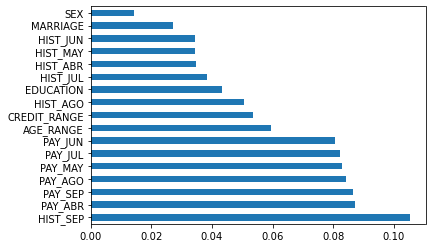

In [1144]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(17).plot(kind = 'barh')

# CLASSIFICATION MODELS

In [1145]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [1146]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1150]:
X_train

array([[-1.24006627,  0.19349913, -1.05680548, ..., -0.21124802,
         1.88428312, -1.20093171],
       [ 0.80640852, -1.08392361,  0.85621194, ..., -0.28727905,
        -0.75994187,  0.09274425],
       [ 0.80640852,  0.19349913, -1.05680548, ..., -0.23598615,
        -1.6413502 , -1.20093171],
       ...,
       [ 0.80640852,  0.19349913, -1.05680548, ...,  0.739968  ,
         1.00287479,  0.73958223],
       [ 0.80640852,  0.19349913, -1.05680548, ..., -0.24223747,
         1.00287479, -1.20093171],
       [ 0.80640852,  1.47092188,  0.85621194, ..., -0.23758906,
         0.12146646, -1.20093171]])

In [1151]:
X_test

array([[ 0.80640852,  0.19349913,  0.85621194, ..., -0.28727905,
         0.12146646,  0.09274425],
       [-1.24006627, -1.08392361,  0.85621194, ..., -0.28727905,
         0.12146646,  0.73958223],
       [-1.24006627,  0.19349913, -1.05680548, ..., -0.28727905,
         0.12146646, -1.20093171],
       ...,
       [ 0.80640852,  0.19349913,  0.85621194, ..., -0.28727905,
        -0.75994187, -0.55409373],
       [-1.24006627,  0.19349913, -1.05680548, ..., -0.18041885,
         1.88428312,  0.09274425],
       [-1.24006627, -1.08392361, -1.05680548, ..., -0.02012856,
         1.00287479,  0.09274425]])

### K-NEAREST NEIGHBORS (KNN)

In [1160]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [1165]:
knn_y_pred = classifier.predict(X_test)

In [1170]:
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

[[6443  566]
 [1278  713]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7009
           1       0.56      0.36      0.44      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.64      0.66      9000
weighted avg       0.77      0.80      0.78      9000



### SUPPORT VECTOR MACHINE (SVM)

In [1171]:
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

In [1172]:
svm_y_pred = svclassifier.predict(X_test)

In [1173]:
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

[[6801  208]
 [1538  453]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.69      0.23      0.34      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



### DECISION TREES (DT)

In [1197]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [1198]:
dt_y_pred = classifier.predict(X_test)

In [1199]:
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

[[5716 1293]
 [1200  791]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.73      9000



#### SE SELECCIONA SVM PORQUE ES EL MODELO QUE MAYOR ACCURACY TIENE CON UN 81% Y MEJOR F1-SCORE CON 89%

In [1210]:
csv_knn_pred = pd.DataFrame(knn_y_pred, columns = ['Predictions']).to_csv('knn_prediction.csv')
csv_svm_pred = pd.DataFrame(svm_y_pred, columns = ['Predictions']).to_csv('svm_prediction.csv')
csv_dt_pred = pd.DataFrame(dt_y_pred, columns = ['Predictions']).to_csv('dt_prediction.csv')

In [1211]:
y_test['PRED'] = svm_y_pred
y_test.to_csv('predictions.csv')

<ipython-input-1211-f9465a85ee68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['PRED'] = svm_y_pred


# TRAYENDO LAS PREDICCIONES SVM

###### En Excel se unió los resultados de la predicción con los datos originales de cada observación, se traerán para revisarlos y compararlos contra la hipótesis inicial

In [1319]:
# Predictions
predictions = pd.read_csv('predictions_svm.csv', header=0)
predictions.head()

,ID,DEFAULT,PRED,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,6498,0,0,200000,2,2,2,32,-2,-2,...,1684,1581,2381,2381,174,1689,1581,800,0,0
1,27050,0,0,280000,1,1,2,37,-1,-1,...,10190,2355,3612,586,6644,10200,2355,3612,4248,0
2,6000,0,0,50000,1,2,1,33,0,0,...,6879,6753,5440,5440,2000,1284,264,109,390,0
3,14691,1,1,20000,1,2,2,28,2,2,...,14255,13729,14706,14320,0,2500,0,1200,0,1500
4,10125,0,0,50000,1,2,2,29,-1,0,...,6411,5341,3483,4093,1345,1000,2000,1000,1000,2000


## Renombrando columnas

In [1320]:
predictions = predictions.rename(columns = {'PAY_0': 'HIST_SEP', 'PAY_2': 'HIST_AGO', 'PAY_3': 'HIST_JUL', 'PAY_4': 'HIST_JUN', 'PAY_5': 'HIST_MAY', 'PAY_6': 'HIST_ABR'}, inplace = False)

In [1321]:
predictions = predictions.rename(columns = {'BILL_AMT1': 'BILL_SEP', 'BILL_AMT2': 'BILL_AGO', 'BILL_AMT3': 'BILL_JUL', 'BILL_AMT4': 'BILL_JUN', 'BILL_AMT5': 'BILL_MAY', 'BILL_AMT6': 'BILL_ABR'}, inplace = False)

In [1322]:
predictions = predictions.rename(columns = {'PAY_AMT1': 'PAY_SEP', 'PAY_AMT2': 'PAY_AGO', 'PAY_AMT3': 'PAY_JUL', 'PAY_AMT4': 'PAY_JUN', 'PAY_AMT5': 'PAY_MAY', 'PAY_AMT6': 'PAY_ABR'}, inplace = False)

In [1323]:
predictions = predictions.rename(columns = {'default payment next month': 'DEFAULT'}, inplace = False)

In [1324]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         9000 non-null   int64
 1   DEFAULT    9000 non-null   int64
 2   PRED       9000 non-null   int64
 3   LIMIT_BAL  9000 non-null   int64
 4   SEX        9000 non-null   int64
 5   EDUCATION  9000 non-null   int64
 6   MARRIAGE   9000 non-null   int64
 7   AGE        9000 non-null   int64
 8   HIST_SEP   9000 non-null   int64
 9   HIST_AGO   9000 non-null   int64
 10  HIST_JUL   9000 non-null   int64
 11  HIST_JUN   9000 non-null   int64
 12  HIST_MAY   9000 non-null   int64
 13  HIST_ABR   9000 non-null   int64
 14  BILL_SEP   9000 non-null   int64
 15  BILL_AGO   9000 non-null   int64
 16  BILL_JUL   9000 non-null   int64
 17  BILL_JUN   9000 non-null   int64
 18  BILL_MAY   9000 non-null   int64
 19  BILL_ABR   9000 non-null   int64
 20  PAY_SEP    9000 non-null   int64
 21  PAY_AGO    900

## DISCRETIZANDO EDAD Y LÍMITE DE CRÉDITO

In [1325]:
# DISCRETIZANDO EDAD
predictions['BINNED'] = pd.cut(x=predictions['AGE'], bins=[0,25,30,40,50,60,70,80,90,100,200])
predictions['AGE_RANGE'] = pd.cut(x=predictions['AGE'], bins=[0,25,30,40,50,60,70,80,90,100,200], labels = [1,2,3,4,5,6,7,8,9,10])
pd.value_counts(predictions.AGE_RANGE)

3     3249
2     2119
4     1796
1     1151
5      594
6       87
7        4
10       0
9        0
8        0
Name: AGE_RANGE, dtype: int64

In [1326]:
# DISCRETIZANDO LÍMITE DE CRÉDITO
predictions['CRDBINNED'] = pd.cut(x=predictions['LIMIT_BAL'], bins=[0,10000,50000,100000,200000,300000,400000,500000,600000,1000000])
predictions['CREDIT_RANGE'] = pd.cut(x=predictions['LIMIT_BAL'], bins=[0,10000,50000,100000,200000,300000,400000,500000,600000,1000000], labels = [1,2,3,4,5,6,7,8,9])
pd.value_counts(predictions.CREDIT_RANGE)

4    2323
2    2195
5    1537
3    1426
6     835
7     475
1     151
8      35
9      23
Name: CREDIT_RANGE, dtype: int64

In [1327]:
predictions.head()

,ID,DEFAULT,PRED,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,...,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,BINNED,AGE_RANGE,CRDBINNED,CREDIT_RANGE
0,6498,0,0,200000,2,2,2,32,-2,-2,...,174,1689,1581,800,0,0,"(30, 40]",3,"(100000, 200000]",4
1,27050,0,0,280000,1,1,2,37,-1,-1,...,6644,10200,2355,3612,4248,0,"(30, 40]",3,"(200000, 300000]",5
2,6000,0,0,50000,1,2,1,33,0,0,...,2000,1284,264,109,390,0,"(30, 40]",3,"(10000, 50000]",2
3,14691,1,1,20000,1,2,2,28,2,2,...,0,2500,0,1200,0,1500,"(25, 30]",2,"(10000, 50000]",2
4,10125,0,0,50000,1,2,2,29,-1,0,...,1345,1000,2000,1000,1000,2000,"(25, 30]",2,"(10000, 50000]",2


In [1328]:
predictions = predictions.drop(['BINNED','CRDBINNED'], axis=1)

In [1329]:
predictions.head()

,ID,DEFAULT,PRED,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,...,BILL_MAY,BILL_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,AGE_RANGE,CREDIT_RANGE
0,6498,0,0,200000,2,2,2,32,-2,-2,...,2381,2381,174,1689,1581,800,0,0,3,4
1,27050,0,0,280000,1,1,2,37,-1,-1,...,3612,586,6644,10200,2355,3612,4248,0,3,5
2,6000,0,0,50000,1,2,1,33,0,0,...,5440,5440,2000,1284,264,109,390,0,3,2
3,14691,1,1,20000,1,2,2,28,2,2,...,14706,14320,0,2500,0,1200,0,1500,2,2
4,10125,0,0,50000,1,2,2,29,-1,0,...,3483,4093,1345,1000,2000,1000,1000,2000,2,2


In [1330]:
predictions.describe()

,ID,DEFAULT,PRED,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,...,BILL_JUL,BILL_JUN,BILL_MAY,BILL_ABR,PAY_SEP,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,15079.246111,0.221222,0.073444,167018.444444,1.598556,1.863889,1.550556,35.563889,-0.027333,-0.138444,...,47523.801556,43943.292444,41026.846667,39846.688667,5540.769667,5810.282556,5507.500556,4767.860000,4791.682889,4839.312222
std,8609.391822,0.415093,0.260879,129851.184168,0.490218,0.807528,0.520178,9.243356,1.096787,1.175438,...,69155.063105,64799.623848,61709.396509,60609.457936,15119.663157,16867.073226,19385.973104,15798.307341,15214.636126,15359.229634
min,1.000000,0.000000,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,...,-157264.000000,-65167.000000,-30481.000000,-30895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7699.000000,0.000000,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,...,2873.000000,2500.000000,1771.500000,1255.250000,1000.000000,926.000000,399.000000,300.000000,257.250000,59.000000
50%,15111.000000,0.000000,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,...,20316.500000,19319.500000,18540.500000,17772.000000,2122.000000,2029.500000,1865.500000,1500.000000,1560.500000,1500.000000
75%,22533.250000,0.000000,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,...,60670.250000,55522.000000,50647.500000,49938.000000,5007.250000,5000.000000,4726.000000,4069.000000,4126.250000,4000.000000
max,29994.000000,1.000000,1.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,...,689643.000000,891586.000000,927171.000000,961664.000000,505000.000000,340000.000000,896040.000000,528897.000000,426529.000000,443001.000000


## Haciendo análisis de los resultados 

In [1331]:
# CANTIDAD DE PERSONAS POR GÉNERO
predictions.groupby('SEX')['SEX'].count()

SEX
1    3613
2    5387
Name: SEX, dtype: int64

In [1332]:
predictions['EDUCATION'] = predictions['EDUCATION'].replace([0,1,2,3,4,5,6],[0,1,2,3,0,0,0])

In [1333]:
# CANTIDAD DE PERSONAS POR NIVEL EDUCATIVO
predictions.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0     160
1    3158
2    4184
3    1498
Name: EDUCATION, dtype: int64

In [1334]:
# CANTIDAD DE PERSONAS POR ESTADO CIVIL
predictions.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0      13
1    4110
2    4786
3      91
Name: MARRIAGE, dtype: int64

In [1335]:
# CANTIDAD DE PERSONAS POR EDAD
predictions.groupby('AGE_RANGE')['AGE_RANGE'].count()

AGE_RANGE
1     1151
2     2119
3     3249
4     1796
5      594
6       87
7        4
8        0
9        0
10       0
Name: AGE_RANGE, dtype: int64

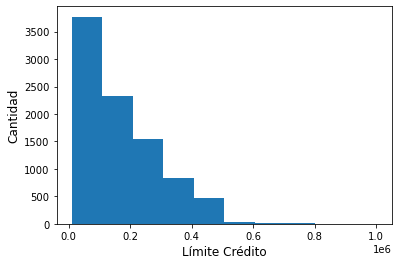

In [1336]:
plt.hist(predictions['LIMIT_BAL'])
plt.xlabel("Límite Crédito", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

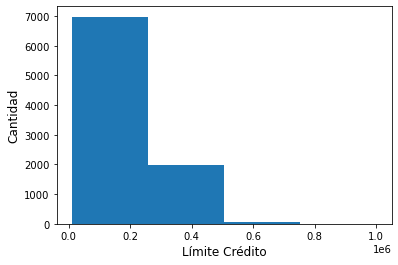

In [1337]:
plt.hist(predictions['LIMIT_BAL'], bins=4)
plt.xlabel("Límite Crédito", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

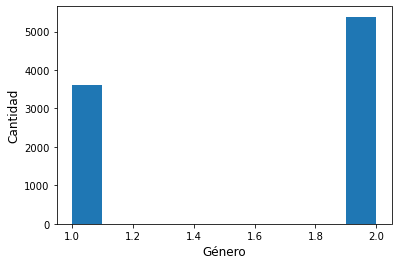

In [1338]:
plt.hist(predictions['SEX'])
plt.xlabel("Género", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

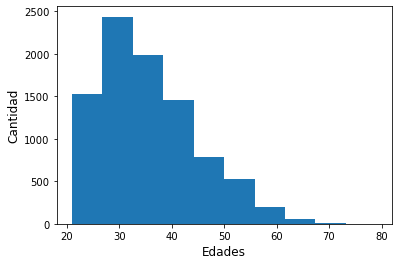

In [1339]:
plt.hist(predictions['AGE'])
plt.xlabel("Edades", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

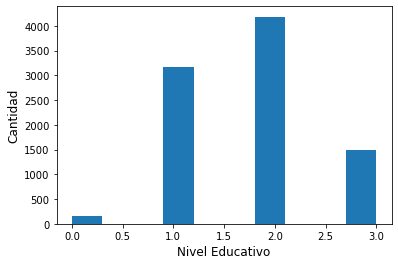

In [1340]:
plt.hist(predictions['EDUCATION'])
plt.xlabel("Nivel Educativo", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

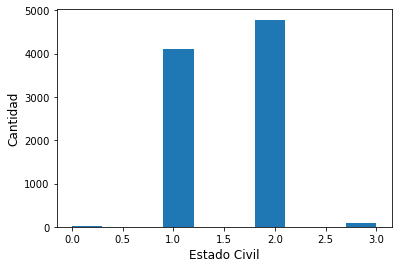

In [1341]:
plt.hist(predictions['MARRIAGE'])
plt.xlabel("Estado Civil", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

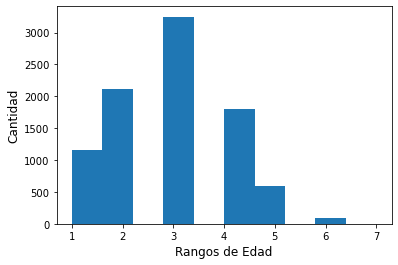

In [1342]:
plt.hist(predictions['AGE_RANGE'])
plt.xlabel("Rangos de Edad", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

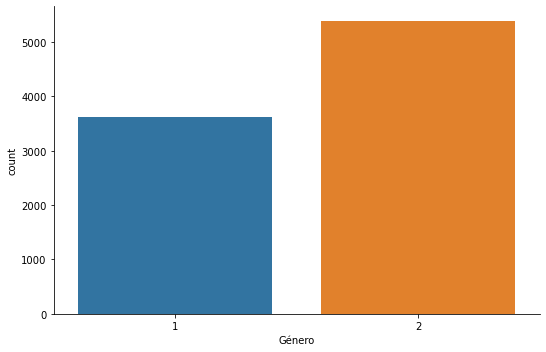

In [1343]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR GÉNERO
fg = sns.catplot('SEX', data=predictions, kind='count', aspect=1.5)
fg.set_xlabels('Género')

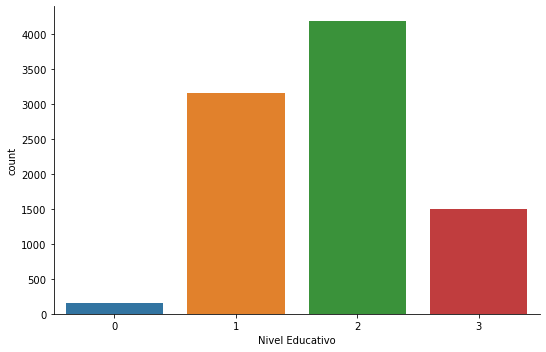

In [1344]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR NIVEL EDUCATIVO
fg = sns.catplot('EDUCATION', data=predictions, kind='count', aspect=1.5)
fg.set_xlabels('Nivel Educativo')

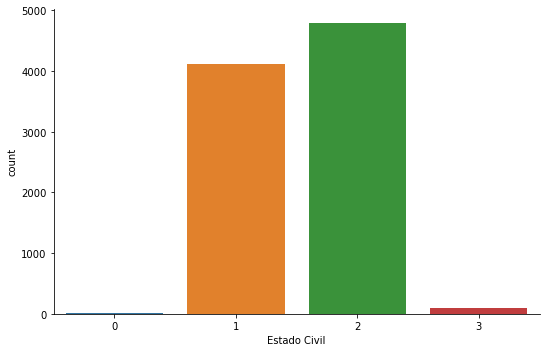

In [1345]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS ESTADO CIVIL
fg = sns.catplot('MARRIAGE', data=predictions, kind='count', aspect=1.5)
fg.set_xlabels('Estado Civil')

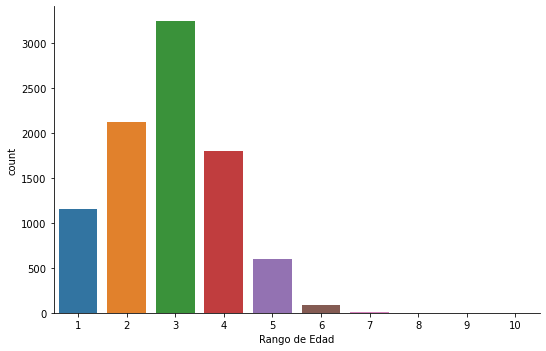

In [1346]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR RANGO DE EDAD
fg = sns.catplot('AGE_RANGE', data=predictions, kind='count', aspect=1.5)
fg.set_xlabels('Rango de Edad')

In [1347]:
# CANTIDAD DE NIVEL EDUCATIVO AGRUPADO POR GÉNERO
predictions.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    0              54
     1            1300
     2            1624
     3             635
2    0             106
     1            1858
     2            2560
     3             863
Name: SEX, dtype: int64

In [1348]:
# CANTIDAD DE ESTADO CIVIL AGRUPADO POR GÉNERO
predictions.groupby(['SEX', 'MARRIAGE'])['SEX'].count()

SEX  MARRIAGE
1    0              4
     1           1616
     2           1961
     3             32
2    0              9
     1           2494
     2           2825
     3             59
Name: SEX, dtype: int64

In [1349]:
# CANTIDAD DE RANGO DE EDAD AGRUPADO POR GÉNERO
predictions.groupby(['SEX', 'AGE_RANGE'])['SEX'].count()

SEX  AGE_RANGE
1    1             336
     2             809
     3            1335
     4             817
     5             271
     6              44
     7               1
     8               0
     9               0
     10              0
2    1             815
     2            1310
     3            1914
     4             979
     5             323
     6              43
     7               3
     8               0
     9               0
     10              0
Name: SEX, dtype: int64

In [1350]:
# CANTIDAD DE HOMBRES Y MUJERES AGRUPADOS POR RANGO DE EDAD
predictions.groupby(['AGE_RANGE','SEX'])['AGE_RANGE'].count()

AGE_RANGE  SEX
1          1       336
           2       815
2          1       809
           2      1310
3          1      1335
           2      1914
4          1       817
           2       979
5          1       271
           2       323
6          1        44
           2        43
7          1         1
           2         3
8          1         0
           2         0
9          1         0
           2         0
10         1         0
           2         0
Name: AGE_RANGE, dtype: int64

In [1351]:
# DISTRIBUCIÓN DE NIVEL EDUCATIVO AGRUPADO POR ESTADO CIVIL
predictions.groupby(['MARRIAGE', 'EDUCATION'])['MARRIAGE'].count()

MARRIAGE  EDUCATION
0         2               2
          3              11
1         0              77
          1            1143
          2            2026
          3             864
2         0              81
          1            2005
          2            2109
          3             591
3         0               2
          1              10
          2              47
          3              32
Name: MARRIAGE, dtype: int64

In [1352]:
# DISTRIBUCIÓN DE NIVEL EDUCATIVO AGRUPADO POR RANGO DE EDAD
predictions.groupby(['AGE_RANGE', 'EDUCATION'])['AGE_RANGE'].count()

AGE_RANGE  EDUCATION
1          0              17
           1             337
           2             671
           3             126
2          0              40
           1             911
           2             956
           3             212
3          0              58
           1            1250
           2            1504
           3             437
4          0              36
           1             499
           2             820
           3             441
5          0               8
           1             139
           2             206
           3             241
6          0               1
           1              21
           2              26
           3              39
7          0               0
           1               1
           2               1
           3               2
8          0               0
           1               0
           2               0
           3               0
9          0               0
           1          

In [1353]:
# DISTRIBUCIÓN DE RANDGO DE EDAD AGRUPADO POR NIVEL EDUCATIVO
predictions.groupby(['EDUCATION', 'AGE_RANGE'])['EDUCATION'].count()

EDUCATION  AGE_RANGE
0          1              17
           2              40
           3              58
           4              36
           5               8
           6               1
           7               0
           8               0
           9               0
           10              0
1          1             337
           2             911
           3            1250
           4             499
           5             139
           6              21
           7               1
           8               0
           9               0
           10              0
2          1             671
           2             956
           3            1504
           4             820
           5             206
           6              26
           7               1
           8               0
           9               0
           10              0
3          1             126
           2             212
           3             437
           4          

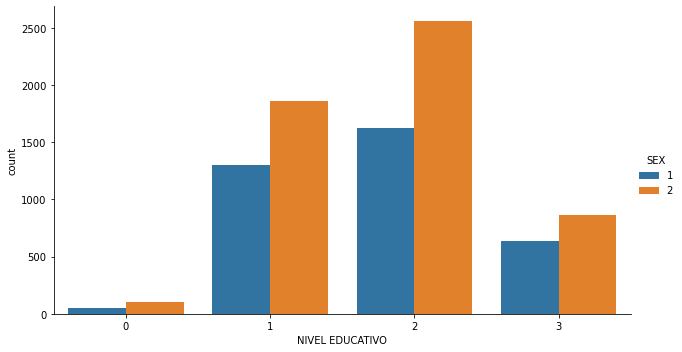

In [1354]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y NIVEL EDUCATIVO
g = sns.catplot('EDUCATION', data=predictions, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('NIVEL EDUCATIVO')

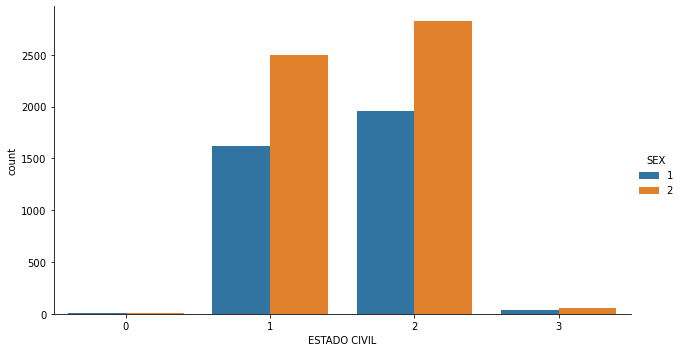

In [1355]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y ESTADO CIVIL
g = sns.catplot('MARRIAGE', data=predictions, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('ESTADO CIVIL')

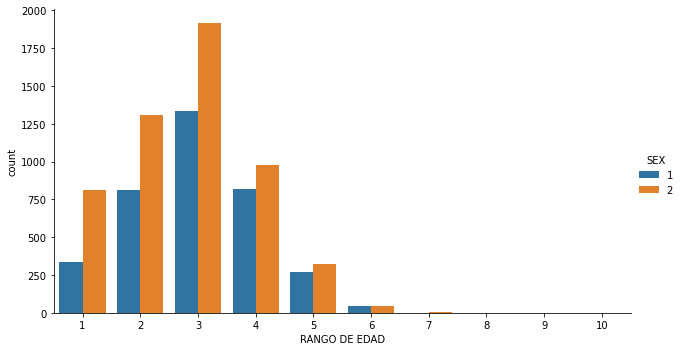

In [1356]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y RANGO DE EDAD
g = sns.catplot('AGE_RANGE', data=predictions, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('RANGO DE EDAD')

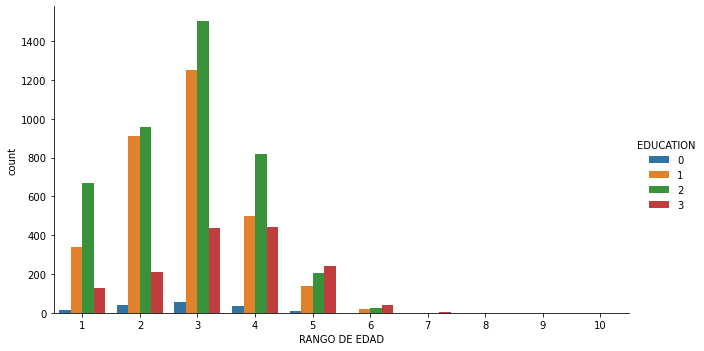

In [1357]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y RANGO DE EDAD
g = sns.catplot('AGE_RANGE', data=predictions, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('RANGO DE EDAD')

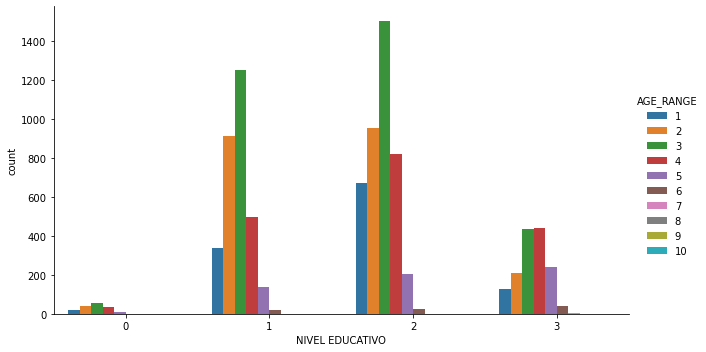

In [1358]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y RANGO DE EDAD
g = sns.catplot('EDUCATION', data=predictions, hue='AGE_RANGE', kind='count', aspect=1.75)
g.set_xlabels('NIVEL EDUCATIVO')

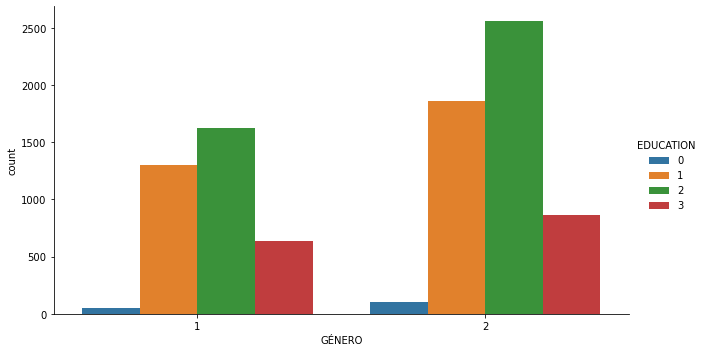

In [1359]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y GÉNERO
g = sns.catplot('SEX', data=predictions, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('GÉNERO')

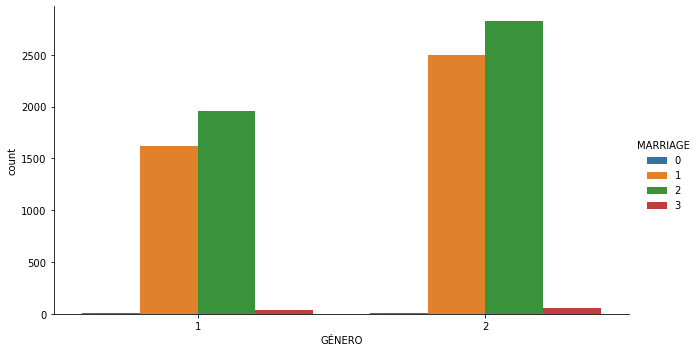

In [1360]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y GÉNERO
g = sns.catplot('SEX', data=predictions, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('GÉNERO')

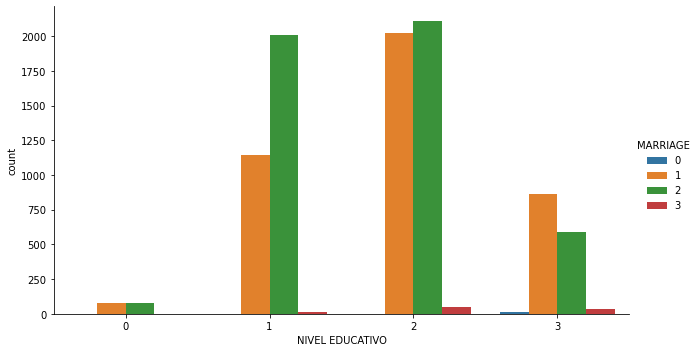

In [1361]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y NIVEL EDUCATIVO
g = sns.catplot('EDUCATION', data=predictions, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('NIVEL EDUCATIVO')

### Hasta acá el análisis nos dice que el set de pruebas tiene un comportamiento similar al del set de datos completo 

## Revisando los clientes con predicción de incumplimiento en el pago 

In [1362]:
NOT_DEFAULT = predictions[predictions['PRED']==0]

In [1363]:
# TOTAL DE PERSONAS QUE SÍ HAN PAGADO 
len(NOT_DEFAULT)

8339

In [1364]:
len(predictions)

9000

In [1365]:
# CANTIDAD DE PERSONAS QUE HAN FALLADO EN EL PAGO
len(predictions)-len(NOT_DEFAULT)

661

In [1366]:
# AGREGANDO UNA NUEVA COLUMNA "DEFAULTED" USANDO LA COLUMNA DEFAULT PARA MAPEAR LA NUEVA CON LOS FACTORES 1=YES 0=NO  
predictions['DEFAULTED'] = predictions.PRED.map({0:'NO', 1:'YES'})

In [1367]:
# AGREGANDO UNA NUEVA COLUMNA "GENDER" USANDO LA COLUMNA DEFAULT PARA MAPEAR LA NUEVA CON LOS FACTORES 1=MALE 2=FEMALE
predictions['GENDER'] = predictions.SEX.map({1:'MALE', 2:'FEMALE'})

In [1368]:
# AGREGANDO UNA NUEVA COLUMNA "EDUCATION_LEVEL" USANDO LA COLUMNA DEFAULT PARA MAPEAR LA NUEVA CON LOS FACTORES 1=GRADUATE 2=UNIVERSITY 3=HIGH SCHOOL {0,4,5,6}=OTHERS
predictions['EDUCATION_LEVEL'] = predictions.EDUCATION.map({0:'OTHERS', 1:'GRADUATE', 2:'UNIVERSITY', 3:'HIGH SCHOOL', 4:'OTHERS', 5:'OTHERS', 6:'OTHERS'})

In [1369]:
# AGREGANDO UNA NUEVA COLUMNA "MARITAL_STATUS" USANDO LA COLUMNA DEFAULT PARA MAPEAR LA NUEVA CON LOS FACTORES 1=MARRIED 2=SINGLE 3=DIVORCE 0=OTHERS
predictions['MARITAL_STATUS'] = predictions.MARRIAGE.map({0:'OTHERS', 1:'MARRIED', 2:'SINGLE', 3:'DIVORCE'})

In [1370]:
# AGREGANDO UNA NUEVA COLUMNA "AGE_RANGE_"  
predictions['AGE_RANGE_'] = predictions.AGE_RANGE.map({1:'0-25', 2:'26-30', 3:'31-40', 3:'41-50', 4:'51-60', 5:'61-70', 6:'71-80'})

In [1371]:
predictions.head()

,ID,DEFAULT,PRED,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,...,PAY_JUN,PAY_MAY,PAY_ABR,AGE_RANGE,CREDIT_RANGE,DEFAULTED,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,AGE_RANGE_
0,6498,0,0,200000,2,2,2,32,-2,-2,...,800,0,0,3,4,NO,FEMALE,UNIVERSITY,SINGLE,41-50
1,27050,0,0,280000,1,1,2,37,-1,-1,...,3612,4248,0,3,5,NO,MALE,GRADUATE,SINGLE,41-50
2,6000,0,0,50000,1,2,1,33,0,0,...,109,390,0,3,2,NO,MALE,UNIVERSITY,MARRIED,41-50
3,14691,1,1,20000,1,2,2,28,2,2,...,1200,0,1500,2,2,YES,MALE,UNIVERSITY,SINGLE,26-30
4,10125,0,0,50000,1,2,2,29,-1,0,...,1000,1000,2000,2,2,NO,MALE,UNIVERSITY,SINGLE,26-30


In [1372]:
# NÚMERO DE PERSONAS QUE FALLARON EN PAGO POR GÉNERO AGRUPADAS POR NIVEL EDUCATIVO
predictions.pivot_table('PRED', 'GENDER', 'EDUCATION_LEVEL', aggfunc=np.sum, margins=True)

EDUCATION_LEVEL,GRADUATE,HIGH SCHOOL,OTHERS,UNIVERSITY,All
GENDER,,,,,
FEMALE,80,84,1,203,368
MALE,76,66,1,150,293
All,156,150,2,353,661


In [1373]:
# NÚMERO DE PERSONAS QUE FALLARON EN PAGO POR GÉNERO AGRUPADAS POR ESTADO CIVIL
predictions.pivot_table('PRED', 'GENDER', 'MARITAL_STATUS', aggfunc=np.sum, margins=True)

MARITAL_STATUS,DIVORCE,MARRIED,OTHERS,SINGLE,All
GENDER,,,,,
FEMALE,6,196,0,166,368
MALE,2,133,0,158,293
All,8,329,0,324,661


In [1374]:
# NÚMERO DE PERSONAS QUE FALLARON EN PAGO POR GÉNERO AGRUPADAS POR RANGO DE EDAD
predictions.pivot_table('PRED', 'GENDER', 'AGE_RANGE_', aggfunc=np.sum, margins=True)

AGE_RANGE_,0-25,26-30,41-50,51-60,61-70,71-80,All
GENDER,,,,,,,
FEMALE,67,93,101,75,25,7,368
MALE,34,61,104,70,19,5,293
All,101,154,205,145,44,12,661


In [1375]:
# NÚMERO DE PERSONAS QUE FALLARON EN PAGO POR NIVEL EDUCATIVO AGRUPADAS POR ESTADO CIVIL
predictions.pivot_table('PRED', 'EDUCATION_LEVEL', 'MARITAL_STATUS', aggfunc=np.sum, margins=True)

MARITAL_STATUS,DIVORCE,MARRIED,OTHERS,SINGLE,All
EDUCATION_LEVEL,,,,,
GRADUATE,1.0,58.0,NaN,97.0,156
HIGH SCHOOL,3.0,91.0,0.0,56.0,150
OTHERS,0.0,0.0,NaN,2.0,2
UNIVERSITY,4.0,180.0,0.0,169.0,353
All,8.0,329.0,0.0,324.0,661


In [1376]:
# NÚMERO DE PERSONAS QUE FALLARON EN PAGO POR NIVEL EDUCATIVO AGRUPADAS POR RANGO DE EDAD
predictions.pivot_table('PRED', 'EDUCATION_LEVEL', 'AGE_RANGE_', aggfunc=np.sum, margins=True)

AGE_RANGE_,0-25,26-30,41-50,51-60,61-70,71-80,All
EDUCATION_LEVEL,,,,,,,
GRADUATE,31,31,54,32,5,3,156
HIGH SCHOOL,9,28,41,48,17,7,150
OTHERS,1,0,1,0,0,0,2
UNIVERSITY,60,95,109,65,22,2,353
All,101,154,205,145,44,12,661


In [1377]:
# NÚMERO DE PERSONAS QUE FALLARON EN PAGO POR ESTADO CIVIL AGRUPADAS POR RANGO DE EDAD
predictions.pivot_table('PRED', 'MARITAL_STATUS', 'AGE_RANGE_', aggfunc=np.sum, margins=True)

AGE_RANGE_,0-25,26-30,41-50,51-60,61-70,71-80,All
MARITAL_STATUS,,,,,,,
DIVORCE,0.0,0.0,1.0,5.0,1.0,1.0,8
MARRIED,13.0,45.0,115.0,113.0,36.0,7.0,329
OTHERS,0.0,0.0,0.0,0.0,0.0,NaN,0
SINGLE,88.0,109.0,89.0,27.0,7.0,4.0,324
All,101.0,154.0,205.0,145.0,44.0,12.0,661


In [1378]:
print('Promedio y mediana de edad de clientes que están entre %0.f y %0.f años de edad respectivamente'%(predictions.AGE.mean(), 
                                                                          predictions.AGE.median()))

Promedio y mediana de edad de clientes que están entre 36 y 34 años de edad respectivamente


In [1379]:
predictions.head()

,ID,DEFAULT,PRED,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,HIST_SEP,HIST_AGO,...,PAY_JUN,PAY_MAY,PAY_ABR,AGE_RANGE,CREDIT_RANGE,DEFAULTED,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,AGE_RANGE_
0,6498,0,0,200000,2,2,2,32,-2,-2,...,800,0,0,3,4,NO,FEMALE,UNIVERSITY,SINGLE,41-50
1,27050,0,0,280000,1,1,2,37,-1,-1,...,3612,4248,0,3,5,NO,MALE,GRADUATE,SINGLE,41-50
2,6000,0,0,50000,1,2,1,33,0,0,...,109,390,0,3,2,NO,MALE,UNIVERSITY,MARRIED,41-50
3,14691,1,1,20000,1,2,2,28,2,2,...,1200,0,1500,2,2,YES,MALE,UNIVERSITY,SINGLE,26-30
4,10125,0,0,50000,1,2,2,29,-1,0,...,1000,1000,2000,2,2,NO,MALE,UNIVERSITY,SINGLE,26-30


In [1380]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               9000 non-null   int64   
 1   DEFAULT          9000 non-null   int64   
 2   PRED             9000 non-null   int64   
 3   LIMIT_BAL        9000 non-null   int64   
 4   SEX              9000 non-null   int64   
 5   EDUCATION        9000 non-null   int64   
 6   MARRIAGE         9000 non-null   int64   
 7   AGE              9000 non-null   int64   
 8   HIST_SEP         9000 non-null   int64   
 9   HIST_AGO         9000 non-null   int64   
 10  HIST_JUL         9000 non-null   int64   
 11  HIST_JUN         9000 non-null   int64   
 12  HIST_MAY         9000 non-null   int64   
 13  HIST_ABR         9000 non-null   int64   
 14  BILL_SEP         9000 non-null   int64   
 15  BILL_AGO         9000 non-null   int64   
 16  BILL_JUL         9000 non-null   int64   


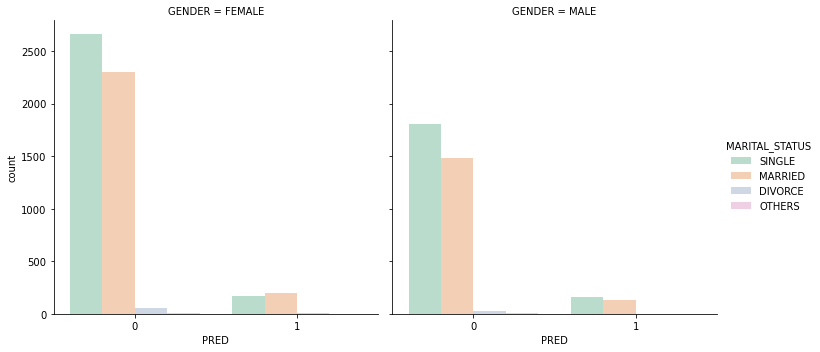

In [1395]:
sns.catplot('PRED', data = predictions, hue='MARITAL_STATUS', kind='count', palette='Pastel2', col='GENDER')

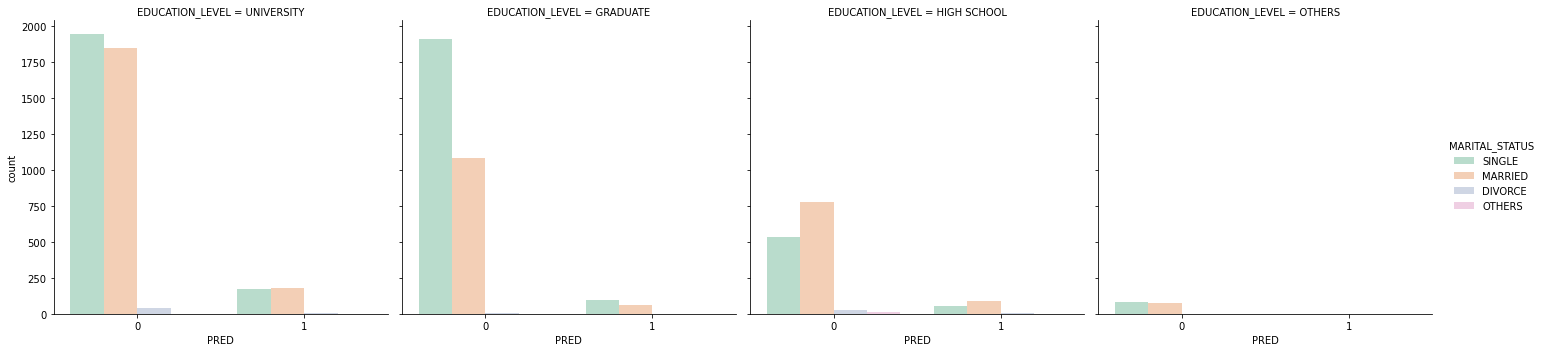

In [1382]:
sns.catplot('PRED', data=predictions, hue='MARITAL_STATUS', kind='count', palette='Pastel2', col='EDUCATION_LEVEL')

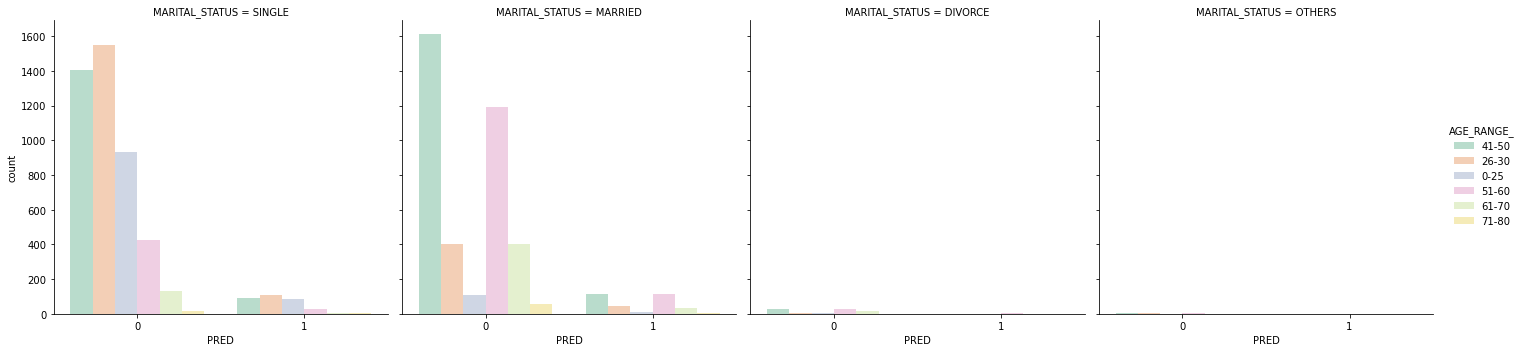

In [1396]:
sns.catplot('PRED', data = predictions, hue = 'AGE_RANGE_', kind = 'count', palette = 'Pastel2', col = 'MARITAL_STATUS')

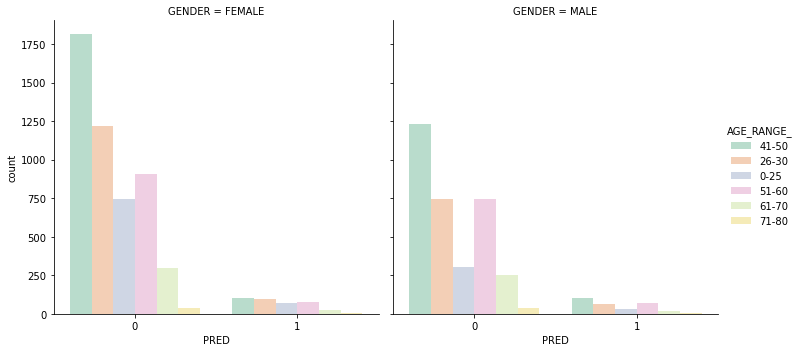

In [1384]:
sns.catplot('PRED', data = predictions, hue='AGE_RANGE_', kind='count', palette='Pastel2', col='GENDER')

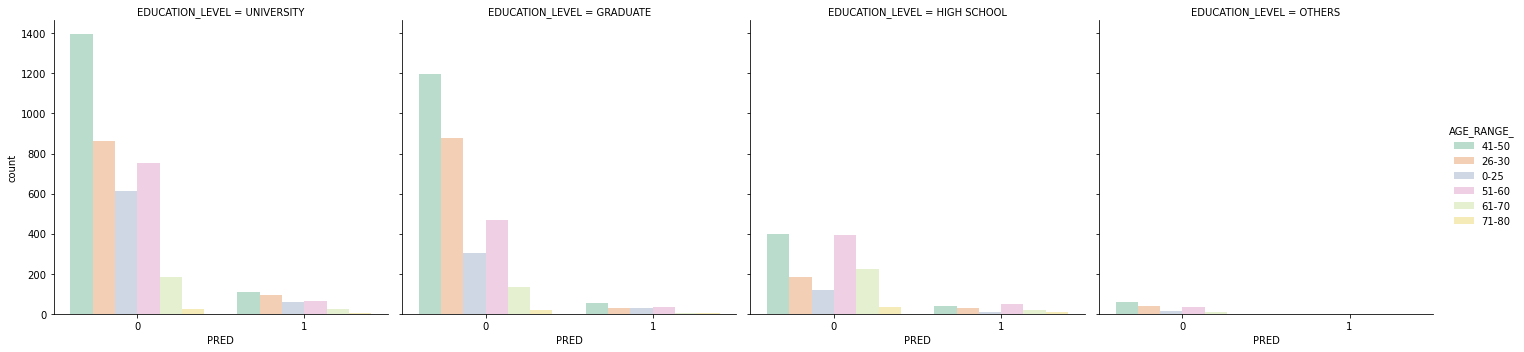

In [1385]:
sns.catplot('PRED', data = predictions, hue='AGE_RANGE_', kind='count', palette='Pastel2', col='EDUCATION_LEVEL')

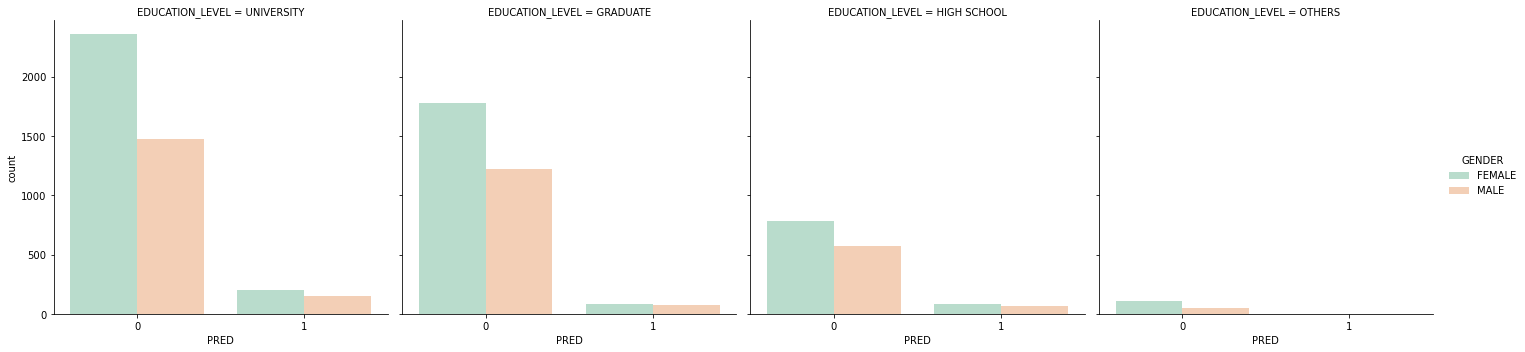

In [1386]:
sns.catplot('PRED', data = predictions, hue='GENDER', kind='count', palette='Pastel2', col='EDUCATION_LEVEL')

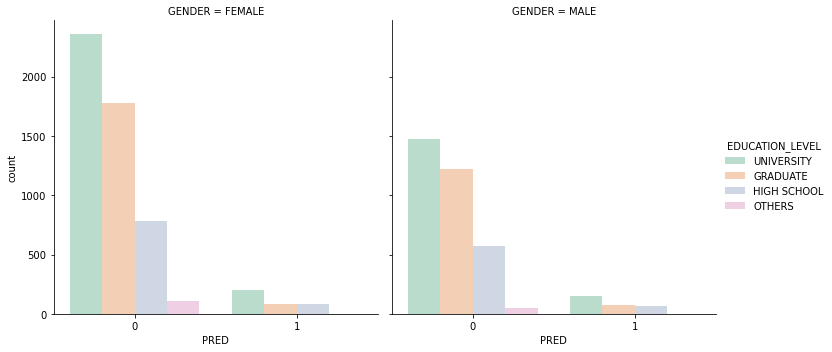

In [1387]:
sns.catplot('PRED', data = predictions, hue='EDUCATION_LEVEL', kind='count', palette='Pastel2', col='GENDER')